<a href="https://colab.research.google.com/github/prtk0007/Chest_Xray_detection/blob/main/project_ray_4_VGG16.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/Kaggle"

In [ ]:
cd /content/Kaggle

/content/Kaggle


In [ ]:
!git clone https://github.com/mhorry/N-CLAHE-MEDICAL-IMAGES.git

Cloning into 'N-CLAHE-MEDICAL-IMAGES'...
remote: Enumerating objects: 2152, done.
remote: Total 2152 (delta 0), reused 0 (delta 0), pack-reused 2152
Receiving objects: 100% (2152/2152), 795.36 MiB | 34.04 MiB/s, done.
Resolving deltas: 100% (6/6), done.
Checking out files: 100% (2576/2576), done.


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:29<00:00, 34.6MB/s]
100% 2.29G/2.29G [00:29<00:00, 82.4MB/s]


In [ ]:
!unzip \*.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
#from keras.applications.resnet50 import ResNet50
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224, 224]

train_path = '/content/Kaggle/chest_xray/chest_xray/train'
valid_path = '/content/Kaggle/chest_xray/chest_xray/test'

In [ ]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [ ]:
for layer in vgg.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/Kaggle/chest_xray/chest_xray/train/*')
folders

['/content/Kaggle/chest_xray/chest_xray/train/NORMAL',
 '/content/Kaggle/chest_xray/chest_xray/train/PNEUMONIA']

In [ ]:
from keras.layers import Dropout
x = Flatten(name='flatten')(vgg.output)
x = Dense(256, activation='relu', name='fc1')(x)
x = Dropout(0.5, name='drop1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dropout(0.5, name='drop2')(x)
x = Dense(2, activation='softmax', name='predictions')(x)

In [ ]:
model = Model(inputs=vgg.input, outputs=x)

In [ ]:
model.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(
  loss='categorical_crossentropy',
  optimizer= opt,
  metrics=['accuracy']
)

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)


In [ ]:
training_set = train_datagen.flow_from_directory('/content/Kaggle/chest_xray/chest_xray/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 5216 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/Kaggle/chest_xray/chest_xray/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 624 images belonging to 2 classes.


In [ ]:
len(training_set)

163

In [ ]:
val_set = val_datagen.flow_from_directory('/content/Kaggle/chest_xray/chest_xray/val',
                                            target_size = (224, 224),
                                            class_mode = 'categorical')

Found 16 images belonging to 2 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
163/163 [==============================] - 111s 680ms/step - loss: 0.2721 - accuracy: 0.8788 - val_loss: 0.3001 - val_accuracy: 0.8878
Epoch 2/20
163/163 [==============================] - 110s 672ms/step - loss: 0.1689 - accuracy: 0.9340 - val_loss: 0.2679 - val_accuracy: 0.9119
Epoch 3/20
163/163 [==============================] - 109s 669ms/step - loss: 0.1531 - accuracy: 0.9423 - val_loss: 0.2968 - val_accuracy: 0.9054
Epoch 4/20
163/163 [==============================] - 106s 650ms/step - loss: 0.1363 - accuracy: 0.9523 - val_loss: 0.2977 - val_accuracy: 0.9054
Epoch 5/20
163/163 [==============================] - 105s 644ms/step - loss: 0.1195 - accuracy: 0.9569 - val_loss: 0.3321 - val_accuracy: 0.9054
Epoch 6/20
163/163 [==============================] - 105s 644ms/step - loss: 0.1194 - accuracy: 0.9559 - val_loss: 0.2676 - val_accuracy: 0.9119
Epoch 7/20
163/163 [==============================] - 105s 641ms/step - loss: 0.1148 - accuracy: 0.9574 - val_loss: 0.3971 -

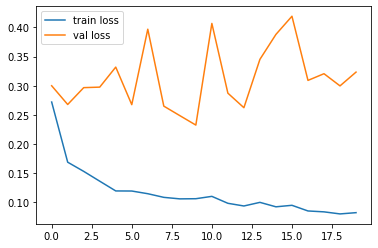

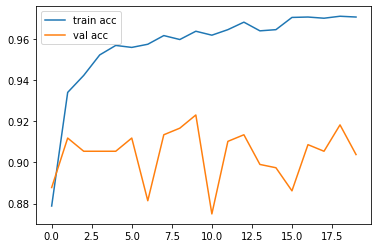

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
model.evaluate(training_set)

163/163 [==============================] - 106s 652ms/step - loss: 0.0520 - accuracy: 0.9801


[0.05198413133621216, 0.9800613522529602]

In [ ]:
model.evaluate(test_set)

20/20 [==============================] - 6s 299ms/step - loss: 0.3235 - accuracy: 0.9038


[0.3234662413597107, 0.9038461446762085]

In [ ]:
model.evaluate(val_set)

1/1 [==============================] - 0s 2ms/step - loss: 0.2638 - accuracy: 0.7500


[0.2638157308101654, 0.75]

In [ ]:
cd /content/drive/MyDrive/Kaggle

/content/drive/MyDrive/Kaggle


In [ ]:
import tensorflow as tf

from keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
import keras.backend as K
print(K.eval(model.optimizer.lr))

1e-04


In [ ]:
img = image.load_img('/content/Kaggle/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg', target_size=(224,224))
x=image.img_to_array(img)
x=np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

In [ ]:
classes

array([[1., 0.]], dtype=float32)

In [ ]:
import pandas as pd 
import cv2                 
import numpy as np         
import os                  
from random import shuffle
from tqdm import tqdm  
import scipy
import skimage
from skimage.transform import resize

In [ ]:
TRAIN_DIR = "/content/chest_xray/chest_xray/train/"
TEST_DIR =  "/content/Kaggle/chest_xray/chest_xray/test/"

In [ ]:
def get_label(Dir):
    for nextdir in os.listdir(Dir):
        if not nextdir.startswith('.'):
            if nextdir in ['NORMAL']:
                label = 0
            elif nextdir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
    return nextdir, label

In [ ]:
def preprocessing_data(Dir):
    X = []
    y = []
    
    for nextdir in os.listdir(Dir):
        nextdir, label = get_label(Dir)
        temp = Dir + nextdir
        
        for image_filename in tqdm(os.listdir(temp)):
            path = os.path.join(temp + '/' , image_filename)
            img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            if img is not None:
                img = skimage.transform.resize(img, (224, 224, 3))
                img = np.asarray(img)
                X.append(img)
                y.append(label)
            
    X = np.asarray(X)
    y = np.asarray(y)
    
    return X,y

In [ ]:
def get_data(Dir):
    X = []
    y = []
    for nextDir in os.listdir(Dir):
        if not nextDir.startswith('.'):
            if nextDir in ['NORMAL']:
                label = 0
            elif nextDir in ['PNEUMONIA']:
                label = 1
            else:
                label = 2
                
            temp = Dir + nextDir
                
            for file in tqdm(os.listdir(temp)):
                img = cv2.imread(temp + '/' + file)
                if img is not None:
                    img = skimage.transform.resize(img, (224, 224, 3))
                    #img_file = scipy.misc.imresize(arr=img_file, size=(150, 150, 3))
                    img = np.asarray(img)
                    X.append(img)
                    y.append(label)
                    
    X = np.asarray(X)
    y = np.asarray(y)
    return X,y

In [ ]:
X_test , y_test = get_data(TEST_DIR)

100%|██████████| 390/390 [00:43<00:00,  8.96it/s]


In [ ]:
from keras.utils.np_utils import to_categorical
y_test = to_categorical(y_test, 2)


In [ ]:
print(y_test.shape)

(624, 2)


In [ ]:
from sklearn.metrics import confusion_matrix
pred = model.predict(y_test)
pred = np.argmax(pred,axis = 1) 
y_true = np.argmax(y_test,axis = 1)

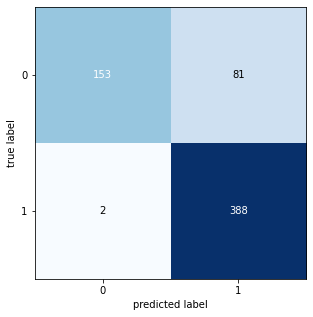

In [ ]:
cm = confusion_matrix(y_true, pred)
from mlxtend.plotting import plot_confusion_matrix
fig, ax = plot_confusion_matrix(conf_mat=cm ,  figsize=(5, 5))
plt.show()

In [ ]:
print('True Positive  (TP) = ', cm[1][1])
print('False Positive (FP) = ', cm[0][1])
print('False Negative (FN) = ', cm[1][0])
print('True Negative  (TN) = ', cm[0][0])
print('-'*26)

True Positive  (TP) =  153
False Positive (FP) =  81
False Negative (FN) =  2
True Negative  (TN) =  388
--------------------------


In [ ]:
if (cm[0][0] + cm[0][1])!=0 and (cm[0][0], cm[1][0])!=0:
      precision= round((cm[0][0] / (cm[0][0] + cm[0][1]))*100, 2) 
      recall   = round((cm[0][0] / (cm[0][0] + cm[1][0]))*100, 2) 
      f1_score = round(2*((precision*recall)/(precision+recall)), 2)       
      print(f'Precision Score: {precision}%')
      print(f'Recall Score: {recall}%')
      print(f'F1 Score: {f1_score}%')
      print('='*50) 
      print('\n')

Precision Score: 65.38%
Recall Score: 98.71%
F1 Score: 78.66%


